## Image Processing with Keras in Python

**Course Structure:**
* Chapter 1. Image Processing with Neural Networks
* Chapter 2. Using Convolutions
* Chapter 3. Going Deeper
* Chapter 4. Understanding and Improving Deep Convolutional Networks

### CHAPTER 1. Image Processing with Neural Networks

#### Part 1.1 Introducing convolutional neural networks (CNNs)

* CNNs are powerful algorithms for processing images
* Pre-requisites for this course:
    1. Deep Learning course 
    2. Machine Learning:
       * Over-fitting
       * Model evaluation
       * Cross-validation

* Images are data to computers as an array of numbers
* Color images have 3 dimensions: width, height, color channels (rgb)

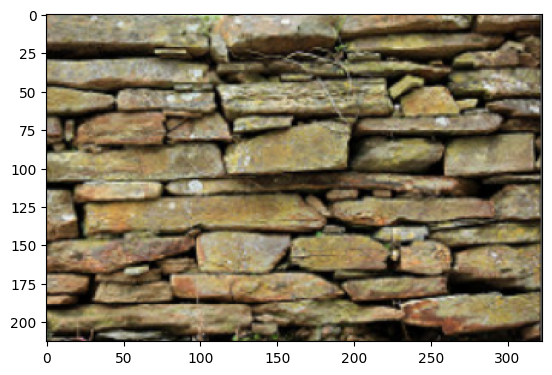

In [5]:
import json

# Code for part 1.1

# images as data: visualizations
import matplotlib.pyplot as plt

# load the image
data = plt.imread('19_datasets/bricks.png')
plt.imshow(data)
plt.show()


(213, 323, 4)


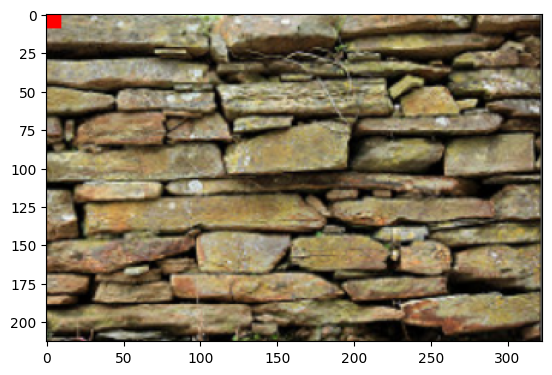

In [6]:
# Code for part 1.1 (continue)

# images as data: changing images

print(data.shape)
# set the red channel to 1, other channels to 0
data[:10, :10, 0] = 1
data[:10, :10, 1] = 0
data[:10, :10, 2] = 0
plt.imshow(data)
plt.show()

#### Part 1.2 Classifying images

* Images of three classes: dresses, t-shirts and shoes
* Build an algorithm to distinguish between these classes
* Training: provide samples from these three classes, along with class labels
* Evaluating: testing it on a portion of data that has been set aside in advance to avoid over-fitting
* Representing class data: one-hot encoding

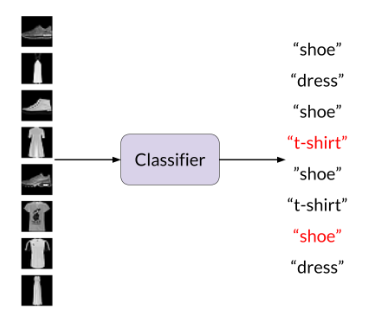

In [7]:
# display image classification
from IPython import display

display.Image("Images/19_image_classification.png")

In [8]:
# Code for part 1.2

# using one-hot encoding to represent images
import numpy as np

# get labels
labels = ['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress']

# set categories array
n_categories = 3
categories = np.array(['shirt', 'dress', 'shoe'])

# initialize ohe_labels
ohe_labels = np.zeros((len(labels), n_categories))

# loop over labels
for ii in range(len(labels)):
    jj = np.where(categories == labels[ii])
    ohe_labels[ii, jj] = 1

In [9]:
# Code for part 1.2 (continue)

# evaluating a classifier
import numpy as np

# get pretended test_labels and predictions
test_labels = np.array([[0., 0., 1.],
                        [0., 1., 0.],
                        [0., 0., 1.],
                        [0., 1., 0.],
                        [0., 0., 1.],
                        [0., 0., 1.],
                        [0., 0., 1.],
                        [0., 1., 0.]])

predictions = np.array([[0., 0., 1.],
                        [0., 1., 0.],
                        [0., 0., 1.],
                        [1., 0., 0.],
                        [0., 0., 1.],
                        [1., 0., 0.],
                        [0., 0., 1.],
                        [0., 1., 0.]])

# calculate the number and proportion of correct predictions
number_correct = (test_labels * predictions).sum()
proportion_correct = (test_labels * predictions).sum() / len(test_labels)
print('Number of correct predictions: ', number_correct)
print('Proportion of correct predictions: ', proportion_correct)


Number of correct predictions:  6.0
Proportion of correct predictions:  0.75


#### Part 1.3 Classification with Keras

* Start with the most simple network: fully connected network
* Steps:
    1. Build network/ model (Sequential, Dense)
    2. Compile the model
    3. Reshape data: **samples** to be rows in an array, columns to represent **pixels** in image
    4. Fit/train the model with 'validation_split' 
    5. Evaluate the model on a separate test data set

In [10]:
# get variables needed in the exercise

# import ast
# import re
import numpy as np

# method 1:
# read string data
train_data_file_path = '19_datasets/train_data.txt'
test_data_file_path = '19_datasets/test_data.txt'
train_labels_file_path = '19_datasets/train_labels.txt'
test_labels_file_path = '19_datasets/test_labels.txt'

# create empty lists
train_data = []
train_labels = []
test_data = []
test_labels = []

with open(train_data_file_path, 'r') as file1:
    for line in file1:
        cleaned_line = line.replace('[', '').replace(']', '').replace('\n', '')
        train_data.append(cleaned_line)
train_data = np.loadtxt(train_data)
train_data = train_data.reshape(50, 28, 28, 1)

with open(test_data_file_path, 'r') as file3:
    for line in file3:
        cleaned_line = line.replace('[', '').replace(']', '').replace('\n', '')
        test_data.append(cleaned_line)
test_data = np.loadtxt(test_data)
test_data = test_data.reshape(10, 28, 28, 1)

with open(train_labels_file_path, 'r') as file2:
    for line in file2:
        cleaned_line = line.replace('[', '').replace(']', '').replace('\n', '')
        train_labels.append(cleaned_line)
train_labels = np.loadtxt(train_labels)
train_labels = train_labels.reshape(50, 3)

with open(test_labels_file_path, 'r') as file2:
    for line in file2:
        cleaned_line = line.replace('[', '').replace(']', '').replace('\n', '')
        test_labels.append(cleaned_line)
test_labels = np.loadtxt(test_labels)
test_labels = test_labels.reshape(10, 3)
       

In [11]:
# Code for part 1.3 

# build a neural network for classification
from keras.models import Sequential
from keras.layers import Dense

# build the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# reshape training data
train_data = train_data.reshape(50, 784)

# fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

# reshape test data
test_data = test_data.reshape(10, 784)

# evaluate the model
model.evaluate(test_data, test_labels)

# it returns loss and accuracy in the list 

Epoch 1/3
2/2 [==============================] - 1s 254ms/step - loss: 1.1454 - accuracy: 0.4000 - val_loss: 0.8784 - val_accuracy: 0.7000
Epoch 2/3
2/2 [==============================] - 0s 24ms/step - loss: 1.0521 - accuracy: 0.5250 - val_loss: 0.8272 - val_accuracy: 0.7000
Epoch 3/3
1/1 [==============================] - 0s 19ms/step - loss: 0.9617 - accuracy: 0.7000


[0.9616537094116211, 0.699999988079071]

### CHAPTER 2. Using Convolutions

#### Part 2.1 Convolutions

**Correlations in images:**
* Natural images contain spatial correlations
* Examples: pixels along a contour or edge
* How to use these correlations?
**Convolution!**
* Convolution is a kernel sliding along the values
* In each location, we select a window that is the size of the kernel
* Multiply the window with kernel, then sum it up
* The final value indicates changes from smaller (DARK) value to bigger (BRIGHT) value or reverse         

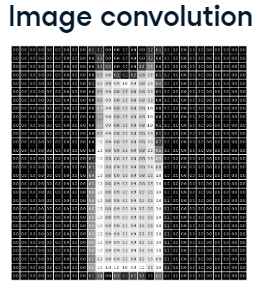

In [12]:
# display convolution
from IPython import display
display.Image("Images/19_convolution.png")

In [13]:
# Code for part 2.1

# one dimensional convolutions

# define array, kernel, and list to store convolution values
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# calculate the output array
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()
print(conv)


[ 1 -1  1 -1  1 -1  1 -1  0  0]


In [14]:
# get the variable for exercise

import numpy as np

# read the text file that stores the variable
im_file_path = '19_datasets/im.txt'

# extract number and reshape it to a numpy array of shape (159, 240)
im = []
with open(im_file_path, 'r') as file:
    for line in file:
        cleaned_line = line.replace('[', '').replace(']', '').replace('\n', '')
        im.append(cleaned_line)
im = np.loadtxt(im)
im = im.reshape(159, 240)       

In [15]:
# Code for part 2.1 (continue)

# image convolutions

# define kernel and result list
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(im.shape)

# calculate the output array
for ii in range(im.shape[0] - 3):
    for jj in range(im.shape[1] - 3):
        result[ii, jj] = (im[ii:ii+3, jj:jj+3] * kernel).sum()
print(result)

[[2.68104587 2.95947725 2.84313738 ... 0.         0.         0.        ]
 [3.01830077 3.07058837 3.05098049 ... 0.         0.         0.        ]
 [2.95163405 3.09934654 3.20261451 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [16]:
# Code for part 2.1 (continue)

# defining image convolution kernels

# 1) horizontal line kernel
kernel_1 = np.array([[-1, -1, -1],
                   [1, 1, 1],
                   [-1, -1, -1]])

# 2) light spot surrounded by dark pixels
kernel_2 = np.array([[-1, -1, -1],
                   [-1, 1, -1],
                   [-1, -1, -1]])

# 3) dark spot surrounded by bright pixels
kernel_3 = np.array([[1, 1, 1],
                   [1, -1, 1],
                   [1, 1, 1]])

#### Part 2.2 Implementing image convolutions in Keras

* Things to represent convolution layers:
    * *'from keras.layers import Conv2D, Flatten'* 
    * *'Conv2D(filters, kernel_size, activation)'*
    * *'Flatten()'* serves as connector between convolution and densely connected layer

In [17]:
# Code for part 2.2

# convolutional network for image classification
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# build the model
model =Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# fit the model
train_data = train_data.reshape(50, 28, 28, 1)
model.fit(train_data, train_labels,
          validation_split=0.2,
          epochs=3, batch_size=10)

# evaluate the model on separate test data
test_data = test_data.reshape(10, 28, 28, 1)
model.evaluate(test_data, test_labels, batch_size=10)

Epoch 1/3
4/4 [==============================] - 1s 43ms/step - loss: 0.9981 - accuracy: 0.6250 - val_loss: 0.8190 - val_accuracy: 1.0000
Epoch 2/3
4/4 [==============================] - 0s 9ms/step - loss: 0.7556 - accuracy: 0.9750 - val_loss: 0.6095 - val_accuracy: 1.0000
Epoch 3/3
1/1 [==============================] - 0s 18ms/step - loss: 0.5956 - accuracy: 1.0000


[0.595594584941864, 1.0]

#### Part 2.3 Tweaking your convolutions

* Issue: output size smaller than input size
1. Adding zero-pad the input image
    * It helps the output feature map has the **same size** as the input
    * Otherwise, you will lose a pixel off the edge
    * *'Conv2D(padding='valid')'*
    * *'Conv2D(padding='same')'
2. Adjust the size of the step we take with the kernel: stride
    * *'Conv2D(strides=)'*
    * Default value of stride is 1
3. Adjust space between the pixels affected by the kernel: dilated convolutions
    * It is useful when you need to aggregate information across multiple scales
    * 'Conv2D(dilation_rate=)'

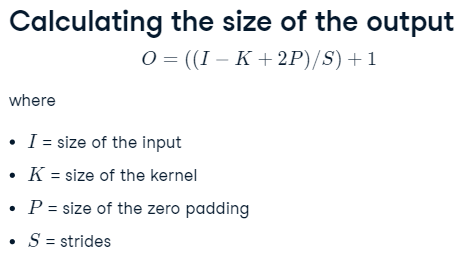

In [18]:
# display calculation of size of the output
from IPython import display
display.Image("Images/19_output_size.png")


In [19]:
# Code for part 2.2

# add padding and strides to a CNN
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense

# create the model and tweak it with padding and strides
model = Sequential()
model.add(Conv2D(10, kernel_size=3, activation='relu',
                 input_shape=(28, 28, 1), padding='same', strides=2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

# note the output size of Conv2D is different from the input size

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 14, 14, 10)        100       
                                                                 
 flatten_3 (Flatten)         (None, 1960)              0         
                                                                 
 dense_6 (Dense)             (None, 3)                 5883      
                                                                 
Total params: 5983 (23.37 KB)
Trainable params: 5983 (23.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### CHAPTER 3. Going Deeper

#### Part 3.1 Going Deeper

* We can build networks with **multiple layers** of convolutional filters
* This idea is motivated by our own visual system, which has multiple layers of processing in it
* Understand the network by looking at the **kinds of things** that the kernels and feature maps in the different layers tend to **respond to:**  
    * Layers in the **early** part of the network tend to respond to **simple** textures or oriented lines
    * **Intermediate layers** of the network tend to respond to **more complex** features such as eyes
    * **Higher layers** of the network tend to respond to **specific types of objects**
    * **Fully connected layers** at the top of the network could **extract useful information** for **object classification**
      
**How deep should you go?**
* Consider computational cost
* May require more data

In [20]:
# Code for part 3.1

# creating a deep learning network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# create the model
model = Sequential()
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(5, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# fit the model to training data
train_data = train_data.reshape(50, 28, 28, 1)
model.fit(train_data, train_labels,
          validation_split=0.2,
          epochs=3, batch_size=10)

# evaluate the model on test data
test_data = test_data.reshape(10, 28, 28, 1)
model.evaluate(test_data, test_labels, batch_size=10)

Epoch 1/3
4/4 [==============================] - 1s 45ms/step - loss: 1.0798 - accuracy: 0.4500 - val_loss: 1.0230 - val_accuracy: 0.7000
Epoch 2/3
4/4 [==============================] - 0s 10ms/step - loss: 1.0135 - accuracy: 0.5500 - val_loss: 0.9313 - val_accuracy: 0.8000
Epoch 3/3
1/1 [==============================] - 0s 19ms/step - loss: 0.9312 - accuracy: 0.9000


[0.9311979413032532, 0.8999999761581421]

#### Part 3.2 How many parameters?

* It is important to think about the **number of parameters** in the network 
* Get the information from *'model.summary()'*

In [21]:
# Code for part 3.1 

# how many parameters in a deep CNN?
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense

# build the model
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# summarize the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 27, 27, 10)        50        
                                                                 
 flatten_5 (Flatten)         (None, 7290)              0         
                                                                 
 dense_8 (Dense)             (None, 3)                 21873     
                                                                 
Total params: 21923 (85.64 KB)
Trainable params: 21923 (85.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Part 3.3 Pooling operations

* One big challenge of neural networks is the **large number of parameters** 
* Solution: summarize the output of convolutional layers in a concise manner
* How to do that? -> **Pooling operation!**

**Max pooling:**
1. Extract the pixels in this part of the image
2. Calculate the maximal value of the pixels there
3. Replace these pixels with one large pixel that stores the maximal value
* Implement max pooling with *'MaxPool2D()'*

In [22]:
# get the variable we need for the exercise
import numpy as np

# read the text file that stores the variable
im_file_path = '19_datasets/im.txt'

# extract number and reshape it to a numpy array of shape (159, 240)
im = []
with open(im_file_path, 'r') as file:
    for line in file:
        cleaned_line = line.replace('[', '').replace(']', '').replace('\n', '')
        im.append(cleaned_line)
im = np.loadtxt(im)
im = im.reshape(159, 240)

In [23]:
# Code for part 3.3

# write your own pooling operation
result = np.zeros((im.shape[0]//2, im.shape[1]//2))

# pooling operation
for ii in range(result.shape[0]):
    for jj in range(result.shape[1]):
        result[ii,jj] = np.max(im[ii*2:ii*2+2, jj*2:jj*2+2])

In [24]:
# Code for part 3.3 (continue)

# build a model with keras pooling layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

# build the model
model = Sequential()
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(2))
model.add(Conv2D(5, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit to training data
model.fit(train_data, train_labels, validation_split=0.2, epochs=3, batch_size=10)

# evaluate on test data
model.evaluate(test_data, test_labels, batch_size=10)
# note the number of parameters has been decreased dramatically.
# however, the accuracy has dropped a little bit.

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 27, 27, 15)        75        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 15)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 5)         305       
                                                                 
 flatten_6 (Flatten)         (None, 720)               0         
                                                                 
 dense_9 (Dense)             (None, 3)                 2163      
                                                                 
Total params: 2543 (9.93 KB)
Trainable params: 2543 (9.93 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

[1.0372390747070312, 0.5]

### CHAPTER 4. Understanding and Improving Deep Convolutional Networks

#### Part 4.1 Tracking learning

* We need to see whether learning is progressing as expected, and whether the network has learned enough
* The **learning curves plot** can help us to track the learning process
* We can also store the optimal parameters for later use with *'ModelCheckpoint()'*
* Then, use again with *'model.load_weights()'*

Epoch 1/3
4/4 [==============================] - 0s 17ms/step - loss: 0.9825 - accuracy: 0.7250 - val_loss: 0.9400 - val_accuracy: 0.6000
Epoch 2/3
4/4 [==============================] - 0s 11ms/step - loss: 0.9238 - accuracy: 0.8250 - val_loss: 0.8822 - val_accuracy: 0.6000
Epoch 3/3
4/4 [==============================] - 0s 10ms/step - loss: 0.8585 - accuracy: 0.9000 - val_loss: 0.8144 - val_accuracy: 0.8000


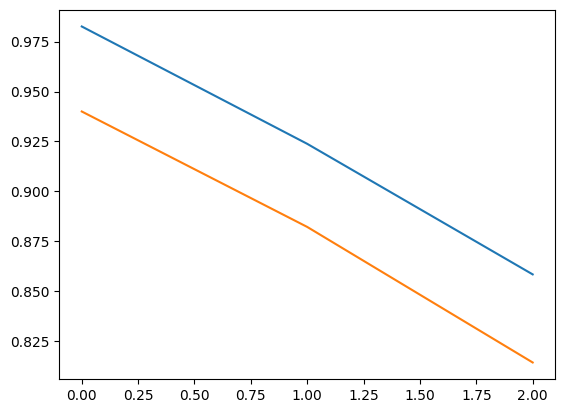

In [25]:
# Code for part 4.1

# plot the learning curves
import matplotlib.pyplot as plt

# train the model and store the training object
training = model.fit(train_data, train_labels, validation_split=0.2,
                     epochs=3, batch_size=10)

# extract the history from the training object
history = training.history

# plot the history
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.show()


In [26]:
# Code for part 4.1 (continue)

# using stored weights to predict in a test set 
from keras.callbacks import ModelCheckpoint

# create checkpoint before fitting the model
checkpoint = ModelCheckpoint('19_weights.hdf5', monitor='val_loss', save_best_only=True)
callbacks_list = [checkpoint]

# fit the model
model.fit(train_data, train_labels, validation_split=0.2, epochs=3, callbacks=callbacks_list)

# load the weights from file
model.load_weights('19_weights.hdf5')

# predict on test data
model.predict(test_data)

Epoch 1/3
2/2 [==============================] - 1s 213ms/step - loss: 0.8097 - accuracy: 0.9500 - val_loss: 0.7795 - val_accuracy: 0.9000
Epoch 2/3
2/2 [==============================] - 0s 59ms/step - loss: 0.7713 - accuracy: 0.9500 - val_loss: 0.7395 - val_accuracy: 0.9000
Epoch 3/3
2/2 [==============================] - 0s 60ms/step - loss: 0.7310 - accuracy: 0.9500 - val_loss: 0.6959 - val_accuracy: 0.9000


E:\PYTHON\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 84ms/step


array([[0.2368955 , 0.2554513 , 0.5076532 ],
       [0.22304983, 0.25296146, 0.5239887 ],
       [0.39973786, 0.4325045 , 0.16775772],
       [0.33229247, 0.27673155, 0.39097598],
       [0.49869883, 0.39715365, 0.10414749],
       [0.39837292, 0.491797  , 0.10983015],
       [0.6155288 , 0.32735714, 0.05711398],
       [0.31140107, 0.40845162, 0.28014734],
       [0.32257992, 0.30901483, 0.36840516],
       [0.3938609 , 0.35956824, 0.24657087]], dtype=float32)

#### Part 4.2 Neural network regularization

**Regularization:**
* One of the most effective strategies to **prevent over-fitting**
* Regularization methods:
1. Dropout
    * Choose a subset of the units in each learning step
    * Ignore them in forward pass and back-propagation stage
    * *'model.add(Dropout())'*
2. Batch normalization
    * Rescale the output of a specific layer
    * Make it has $0$ mean and standard deviation of $1$
    * *'model.add(BatchNormalization())'*
      
* NOTE: These two methods might NOT work well together
        

In [27]:
# Code for part 4.2

# adding dropout to your network
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten

# build the model
model = Sequential()
model.add(Conv2D(15, kernel_size=2, activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Dropout(0.2))
model.add(Conv2D(5, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [28]:
# Code for part 4.2 (continue)

# add batch normalization to your network
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, BatchNormalization

# build the model
model = Sequential()
model.add(Conv2D(15, kernel_size=2, activation='relu',
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(5, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

#### Part 4.3 Interpreting the model

* The Main drawback of convolutional neural networks is that they are "black boxes"
* It is important to improve the interpretability of neural networks 
    * For example, visualizing what different parts of the network are doing
    * Select layers with *'model.layers[0]'*
    * Get its weights with *'.get_weights()'*
    * It is great to visualize the kernel responses

In [29]:
# Code for part 4.3 

# extracting a kernel from a trained network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# build the model 
# build the model
model = Sequential()
model.add(Conv2D(15, kernel_size=2, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(2))
model.add(Conv2D(5, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
# model.summary()

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# load the weights
model.load_weights('19_weights.hdf5')

# get the first layer's weights
c1 = model.layers[0]
weights1 = c1.get_weights()

# pull out the first channel of the first kernel in the first layer
kernel = weights1[0][..., 0, 0]
print(kernel)

[[-0.20191953  0.22229053]
 [-0.11821838  0.28789222]]


In [30]:
# pre-defined function for visualization
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)

    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+2, jj:jj+2] * kernel)

    return result

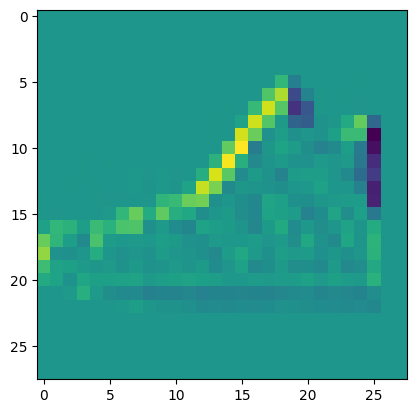

In [31]:
# Code for part 4.3

# visualizing kernel responses
import matplotlib.pyplot as plt

# convolve with the fourth image in test data
out = convolution(test_data[3, :, :, 0], kernel)

# show image
plt.imshow(out)
plt.show()

# this is the kernel response of the fourth image

This is the end of this course!